In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Week1

In [2]:
df = pd.read_csv('health care diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no null/missing value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# Replace 0 with null values for columns as follow:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
df[cols] = df[cols].replace({0:np.nan})

### Visually explore these variables using histograms. Treat the missing values accordingly

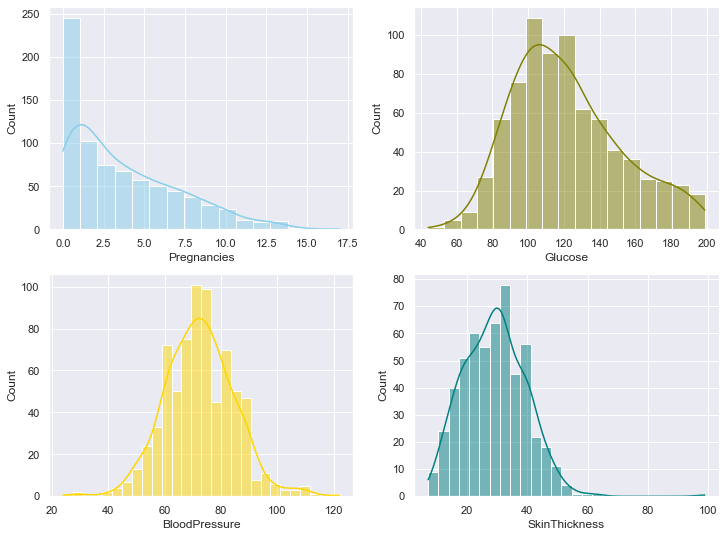

In [7]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(12, 9))

sns.histplot(data=df, x="Pregnancies", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="Glucose", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="BloodPressure", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="SkinThickness", kde=True, color="teal", ax=axs[1, 1])

plt.show()

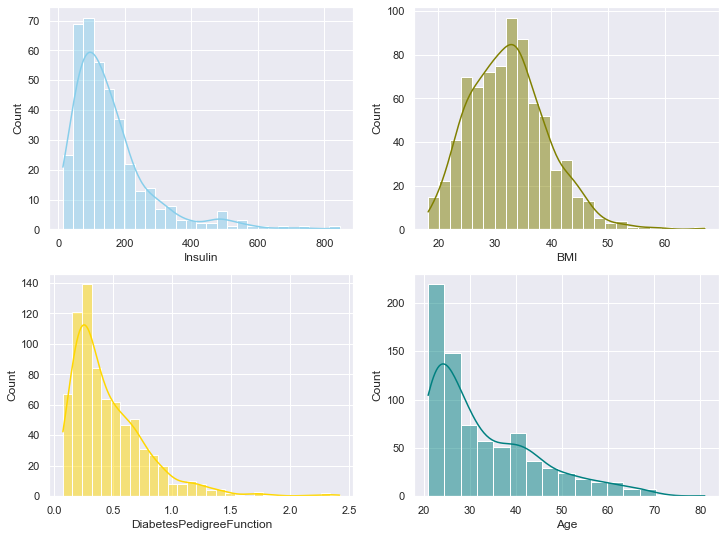

In [8]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(12, 9))

sns.histplot(data=df, x="Insulin", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="BMI", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="DiabetesPedigreeFunction", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="Age", kde=True, color="teal", ax=axs[1, 1])

plt.show()

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Create a count (frequency) plot describing the data types and the count of variables

In [10]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

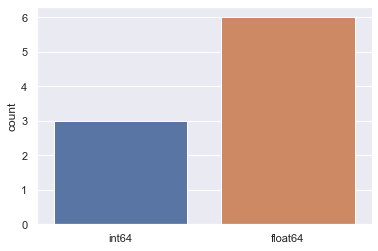

In [11]:
sns.countplot(df.dtypes.map(str))
plt.show()

## Week2

### Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action

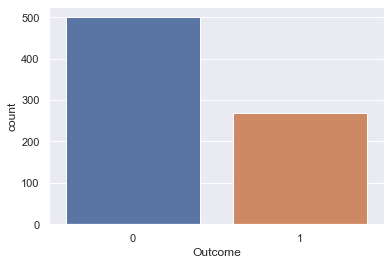

In [12]:
sns.countplot(x="Outcome", data=df)

Finding: more people with negative result compare to people with positive (having diabetes).

### Create scatter charts between the pair of variables to understand the relationships. Describe your findings

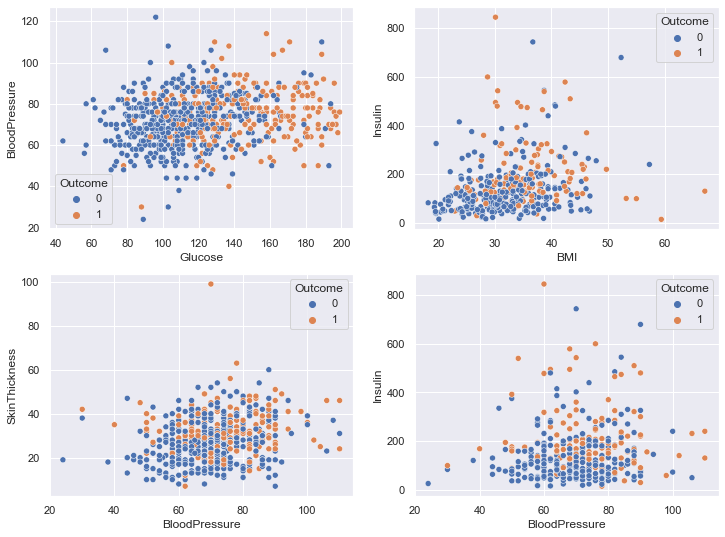

In [13]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(12, 9))

sns.scatterplot(data=df, x= "Glucose" ,y= "BloodPressure", hue="Outcome", ax=axs[0, 0])
sns.scatterplot(data=df, x= "BMI" ,y= "Insulin", hue="Outcome", ax=axs[0, 1])
sns.scatterplot(data=df, x="BloodPressure", y='SkinThickness',hue="Outcome", ax=axs[1, 0])
sns.scatterplot(data=df, x="BloodPressure", y="Insulin",hue="Outcome", ax=axs[1, 1])

plt.show()

Conclusions:
* The higher level of glucose, the higher blood pressure is
* People with low BMI, tend to have low level of insulin
* No noticeable correlation between blood pressure and skin thickness
* Blood pressure does not effect the level of insulin, and vice versa

### Perform correlation analysis. Visually explore it using a heat map

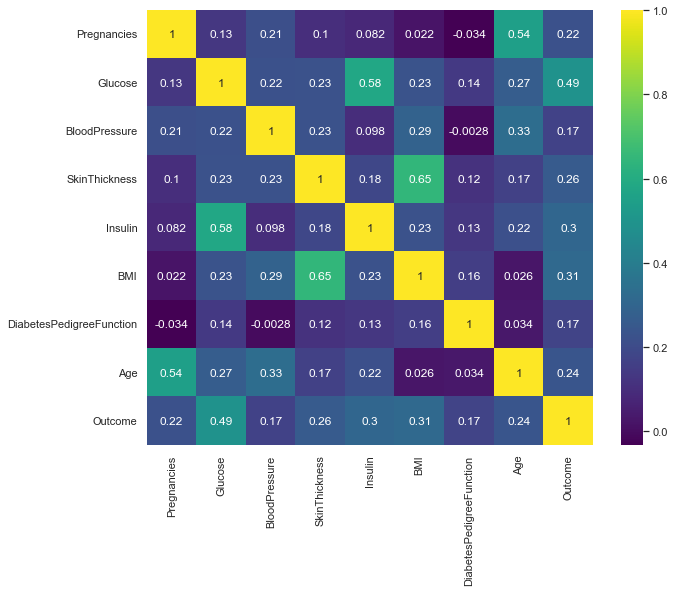

In [14]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

## Week 3

### Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm

In [15]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
# Classify features and label
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state =123)

#### Logistic Regression

In [20]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [21]:
pred = lr.predict(X_test)

In [22]:
# classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        84
           1       0.57      0.35      0.44        34

    accuracy                           0.74       118
   macro avg       0.67      0.62      0.63       118
weighted avg       0.72      0.74      0.72       118



Confusion matrix for Logistic Regression


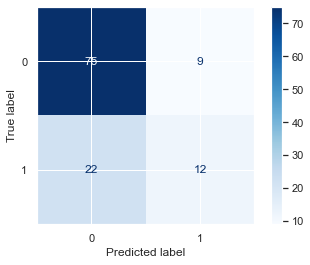

In [23]:
print('Confusion matrix for Logistic Regression')
disp = plot_confusion_matrix(lr, X_test, y_test, cmap='Blues')

#### Decision Tree Classifier

In [24]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
dt_pred = lr.predict(X_test)

In [25]:
# classification_report
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        84
           1       0.57      0.35      0.44        34

    accuracy                           0.74       118
   macro avg       0.67      0.62      0.63       118
weighted avg       0.72      0.74      0.72       118



Confusion matrix for Decision Tree


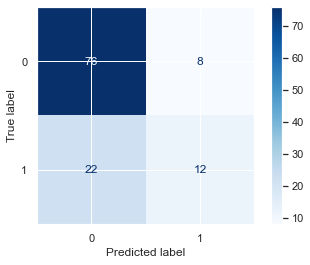

In [26]:
print('Confusion matrix for Decision Tree')
disp = plot_confusion_matrix(dt, X_test, y_test, cmap='Blues')

#### Random Forest

In [27]:
rf = RandomForestClassifier(n_estimators=11)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [28]:
# classification_report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        84
           1       0.62      0.53      0.57        34

    accuracy                           0.77       118
   macro avg       0.72      0.70      0.71       118
weighted avg       0.76      0.77      0.77       118



Confusion matrix for Random Forest


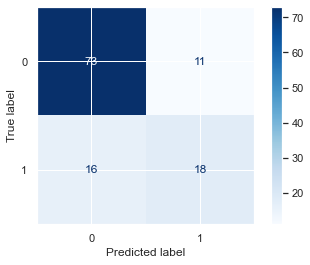

In [29]:
print('Confusion matrix for Random Forest')
disp = plot_confusion_matrix(rf, X_test, y_test, cmap='Blues')

#### Support Vector Classifier

In [30]:
svc = SVC(kernel='rbf',gamma='auto')
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)

In [31]:
# classification_report
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        84
           1       0.00      0.00      0.00        34

    accuracy                           0.71       118
   macro avg       0.36      0.50      0.42       118
weighted avg       0.51      0.71      0.59       118



Confusion matrix for Support Vector Classifier


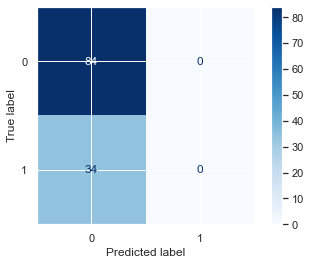

In [32]:
print('Confusion matrix for Support Vector Classifier')
disp = plot_confusion_matrix(svc, X_test, y_test, cmap='Blues')

#### KNN

In [33]:
knn = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p = 2)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [34]:
# classification_report
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86        84
           1       0.67      0.53      0.59        34

    accuracy                           0.79       118
   macro avg       0.75      0.71      0.72       118
weighted avg       0.78      0.79      0.78       118



Confusion matrix for KNN algorithm


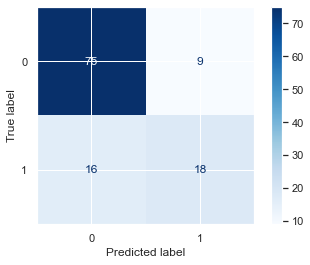

In [35]:
print('Confusion matrix for KNN algorithm')
disp = plot_confusion_matrix(knn, X_test, y_test, cmap='Blues')

So based on precision alonbe, KNN result is the best comnpared to all other models. Support vector classifier gives the worst result by predicted all would had diabetes.

## Week 4

### Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used

In [36]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Precision Recall Curve for Logistic Regression

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

#### Logistic Regression

AUC: 0.836


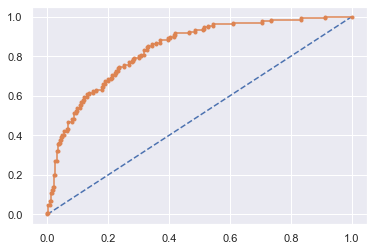

In [41]:
# predict probabilities
probs = lr.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the lr
plt.plot(fpr, tpr, marker='.')

f1=0.620 auc=0.694 ap=0.697


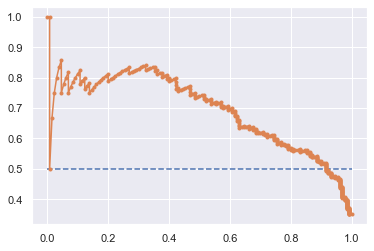

In [39]:
#Precision Recall Curve for Logistic Regression
# predict probabilities
probs = lr.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = lr.predict(X)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, probs)
# calculate F1 score
f1 = f1_score(y, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the lr
plt.plot(recall, precision, marker='.')

#### Decision Tree Classifier

AUC: 0.902


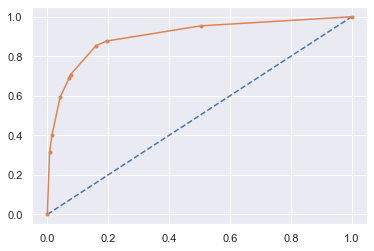

In [42]:
# predict probabilities
probs = dt.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the dt
plt.plot(fpr, tpr, marker='.')

#### Random Forest

AUC: 0.962


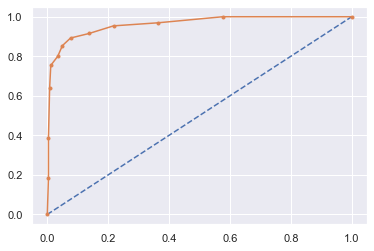

In [44]:
# predict probabilities
probs = rf.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the rf
plt.plot(fpr, tpr, marker='.')

#### KNN

AUC: 0.829


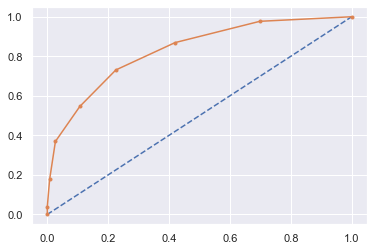

In [47]:
# predict probabilities
probs = knn.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the knn
plt.plot(fpr, tpr, marker='.')

AUC: 0.829
True Positive Rate - [0.         0.03846154 0.17692308 0.36923077 0.54615385 0.73076923
 0.86923077 0.97692308 1.        ], False Positive Rate - [0.         0.         0.00763359 0.02671756 0.10687023 0.22519084
 0.41984733 0.69847328 1.        ] Thresholds - [2.         1.         0.85714286 0.71428571 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ]


Text(0, 0.5, 'True Positive Rate')

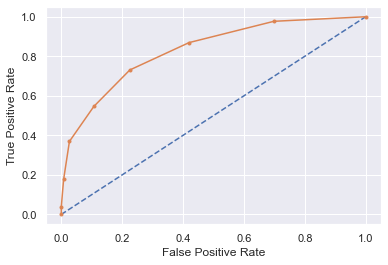

In [51]:
# predict probabilities
probs = knn.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")